# Applied Statistics Project

## Q1. Data Collection and Data Preprocessing

### 1) Import required libraries and import csv file into a dataframe.

In [8]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [9]:
# Importing csv file into a dataframe
df = pd.read_csv('honeyproduction.csv')

### 2) Show the column names of all individual datasets.

In [10]:
# Showing the names of the columns using head()
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### 3) Change the datatype of all columns expect price per lb.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [12]:
# Changing the datatypes of all columns except priceperlb to int
df = df.astype({'numcol':'int','yieldpercol':'int','totalprod':'int','stocks':'int','prodvalue':'int','year':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    int32  
 2   yieldpercol  626 non-null    int32  
 3   totalprod    626 non-null    int32  
 4   stocks       626 non-null    int32  
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    int32  
 7   year         626 non-null    int32  
dtypes: float64(1), int32(6), object(1)
memory usage: 24.6+ KB


### 4) Share 5-point summary and the details about the dataset. 

In [13]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


### 5) Find the average production per state and shape of dataset.

In [14]:
df[['state','totalprod']].groupby('state').mean()

,totalprod
state,
AL,8.254667e+05
AR,2.810400e+06
AZ,2.032267e+06
CA,2.316900e+07
CO,1.750600e+06
FL,1.646987e+07
GA,3.299933e+06
HI,8.431333e+05
IA,2.080000e+06


In [15]:
df.shape

(626, 8)

### 6) Check the distribution of records for every year. 

C:\Users\fenuj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


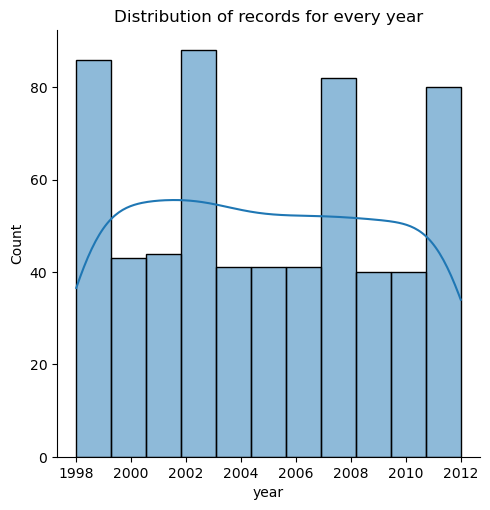

In [16]:
sns.displot(data=df,x='year',kde=True)
plt.title('Distribution of records for every year')
plt.show() 

### 7) Find top 10 years with highest totalprod. 

In [17]:
yearprod = df[['year','totalprod']].groupby('year').sum().round().sort_values('totalprod',ascending=False)
yearprod.head(10)

,totalprod
year,
2000,219558000
1998,219519000
1999,202387000
2001,185748000
2004,182729000
2003,181372000
2010,175294000
2005,173969000
2002,171265000


### 8) Find years with highest and lowest totalprod. 

In [18]:
# Year with highest totalpod
yearprod.head()

,totalprod
year,
2000,219558000
1998,219519000
1999,202387000
2001,185748000
2004,182729000


The Highest total production is 219558000 in the year 2000

In [19]:
# Year with lowest totalpod
yearprod.tail()

,totalprod
year,
2006,154238000
2007,147621000
2011,147201000
2009,145068000
2012,140907000


The lowest total production is 140907000 in the year 2012

### 9) Find top 10 states with highest totalprod.

In [20]:
# Top 10 states with highest total porduction
stateprod = df[['state','totalprod']].groupby('state').sum().round().sort_values('totalprod',ascending=False)
stateprod.head(10)

,totalprod
state,
ND,475085000
CA,347535000
SD,266141000
FL,247048000
MT,156562000
MN,144360000
TX,104904000
WI,81833000
MI,72820000


### 10) Show bottom 10 years with highest totalprod.

In [21]:
# Showing bottom 10 years with highest total production
yearprod = df[['year','totalprod']].groupby('year').sum().round().sort_values('totalprod',ascending=False)
yearprod.tail(10)

,totalprod
year,
2003,181372000
2010,175294000
2005,173969000
2002,171265000
2008,162972000
2006,154238000
2007,147621000
2011,147201000
2009,145068000


## Q2. Data Visualization

### 1) Visualize Q 1.9 and Q1.10.

In [22]:
topstate = stateprod[:10]

In [23]:
topstate = topstate.reset_index()

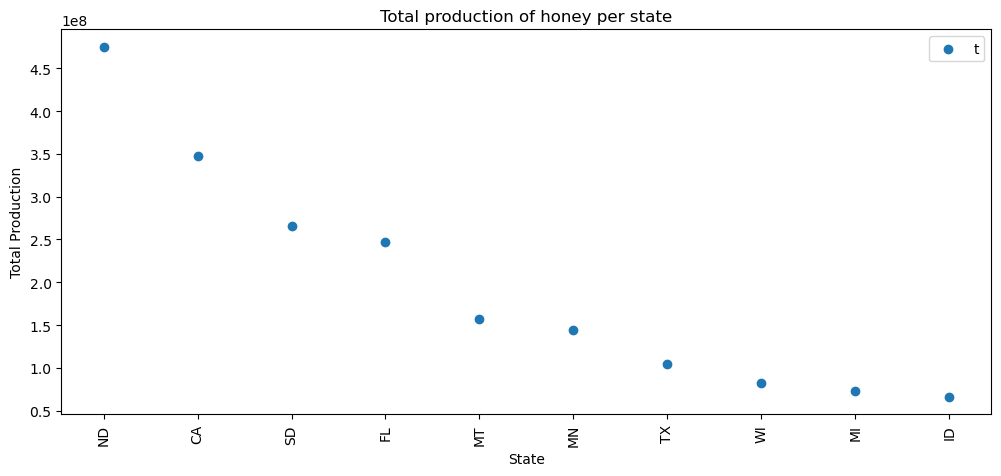

In [24]:
# Visualizizng Q1.9, top 10 states with the highest total production
plt.figure(figsize=(12, 5))
plt.scatter(topstate["state"], topstate["totalprod"])
plt.xlabel("State")
plt.ylabel("Total Production")
plt.xticks(rotation=90)
plt.title('Total production of honey per state')
plt.legend("totalprod")
plt.show()

North Dakota(ND) is having the highest production and goes down to Idaho(ID) having the lowest production of honey respectively.

In [25]:
bottomyear = yearprod[-10:]

In [26]:
bottomyear = bottomyear.reset_index()

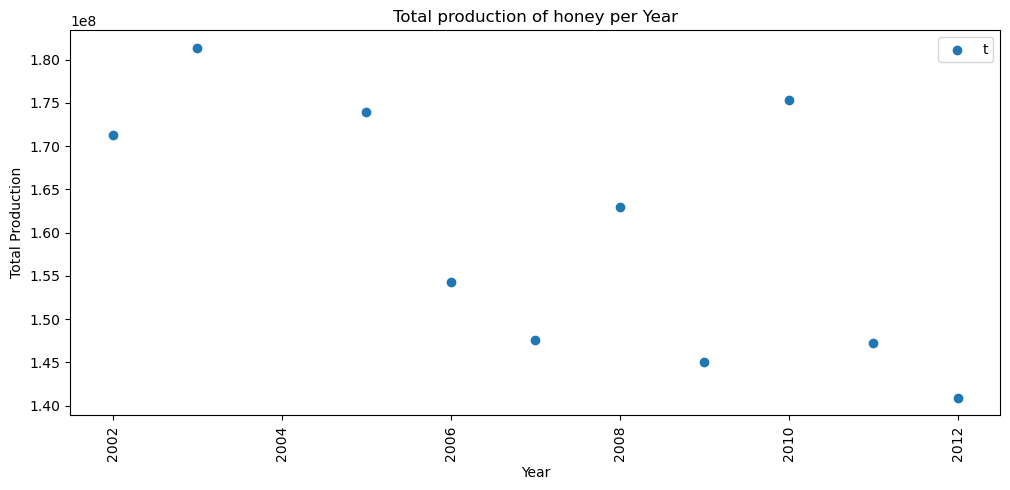

In [27]:
# Visualizizng Q1.10, bottom 10 years with the highest total production
plt.figure(figsize=(12, 5))
plt.scatter(bottomyear["year"], bottomyear["totalprod"])
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.xticks(rotation=90)
plt.title('Total production of honey per Year')
plt.legend("totalprod")
plt.show()

### 2) Find states with minimum and max price per lb.

In [28]:
# Finding the state with the maximum price per lb
maxprice = df['priceperlb'].max()
maxstate = df[df['priceperlb']==maxprice]
maxstate

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
593,HI,10000,75,750000,263000,4.15,3113000,2012


State Hawaii(HI) has the maximum price per lb(4.15).

In [29]:
# Finding the state with the minimum price per lb
minprice = df['priceperlb'].min()
minstate = df[df['priceperlb']==minprice]
minstate

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
57,LA,48000,114,5472000,821000,0.49,2681000,1999


State Louisiana(LA) has the minimum price per lib(0.49).

### 3) Visualize Q 2.2

In [30]:
stateprice = pd.concat([maxstate,minstate])

In [31]:
stateprice = stateprice.drop(['numcol', 'yieldpercol', 'totalprod', 'stocks', 'prodvalue', 'year'], axis = 1)

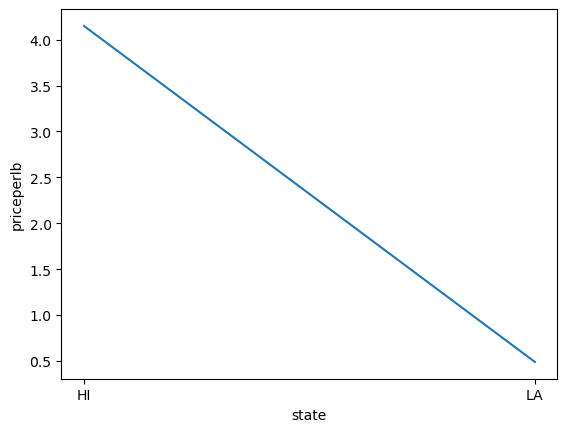

In [32]:
sns.lineplot(data=stateprice, x='state',y='priceperlb');

This shows that the priceperlb is high as 4.15 in HI state and low as 0.49 in LA state.

### 4) Visualize the totalprod with respect to year. 

C:\Users\fenuj\AppData\Local\Temp\ipykernel_9492\1515599668.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='year', y='totalprod', ci=False);


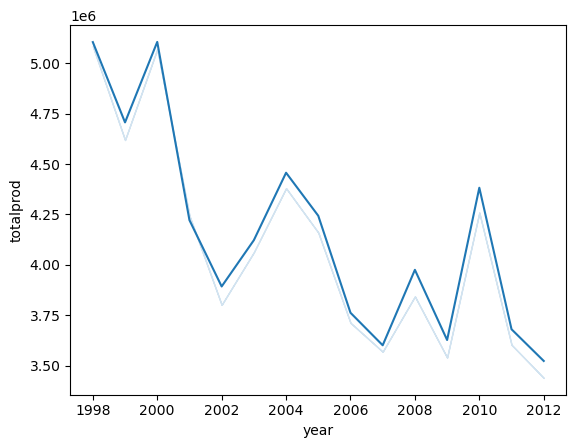

In [33]:
sns.lineplot(data=df, x='year', y='totalprod', ci=False);

According to the visualization the totalproduction has eventually decreased over the past years.

### 5) Visualize pairplot and share your insights. 

C:\Users\fenuj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


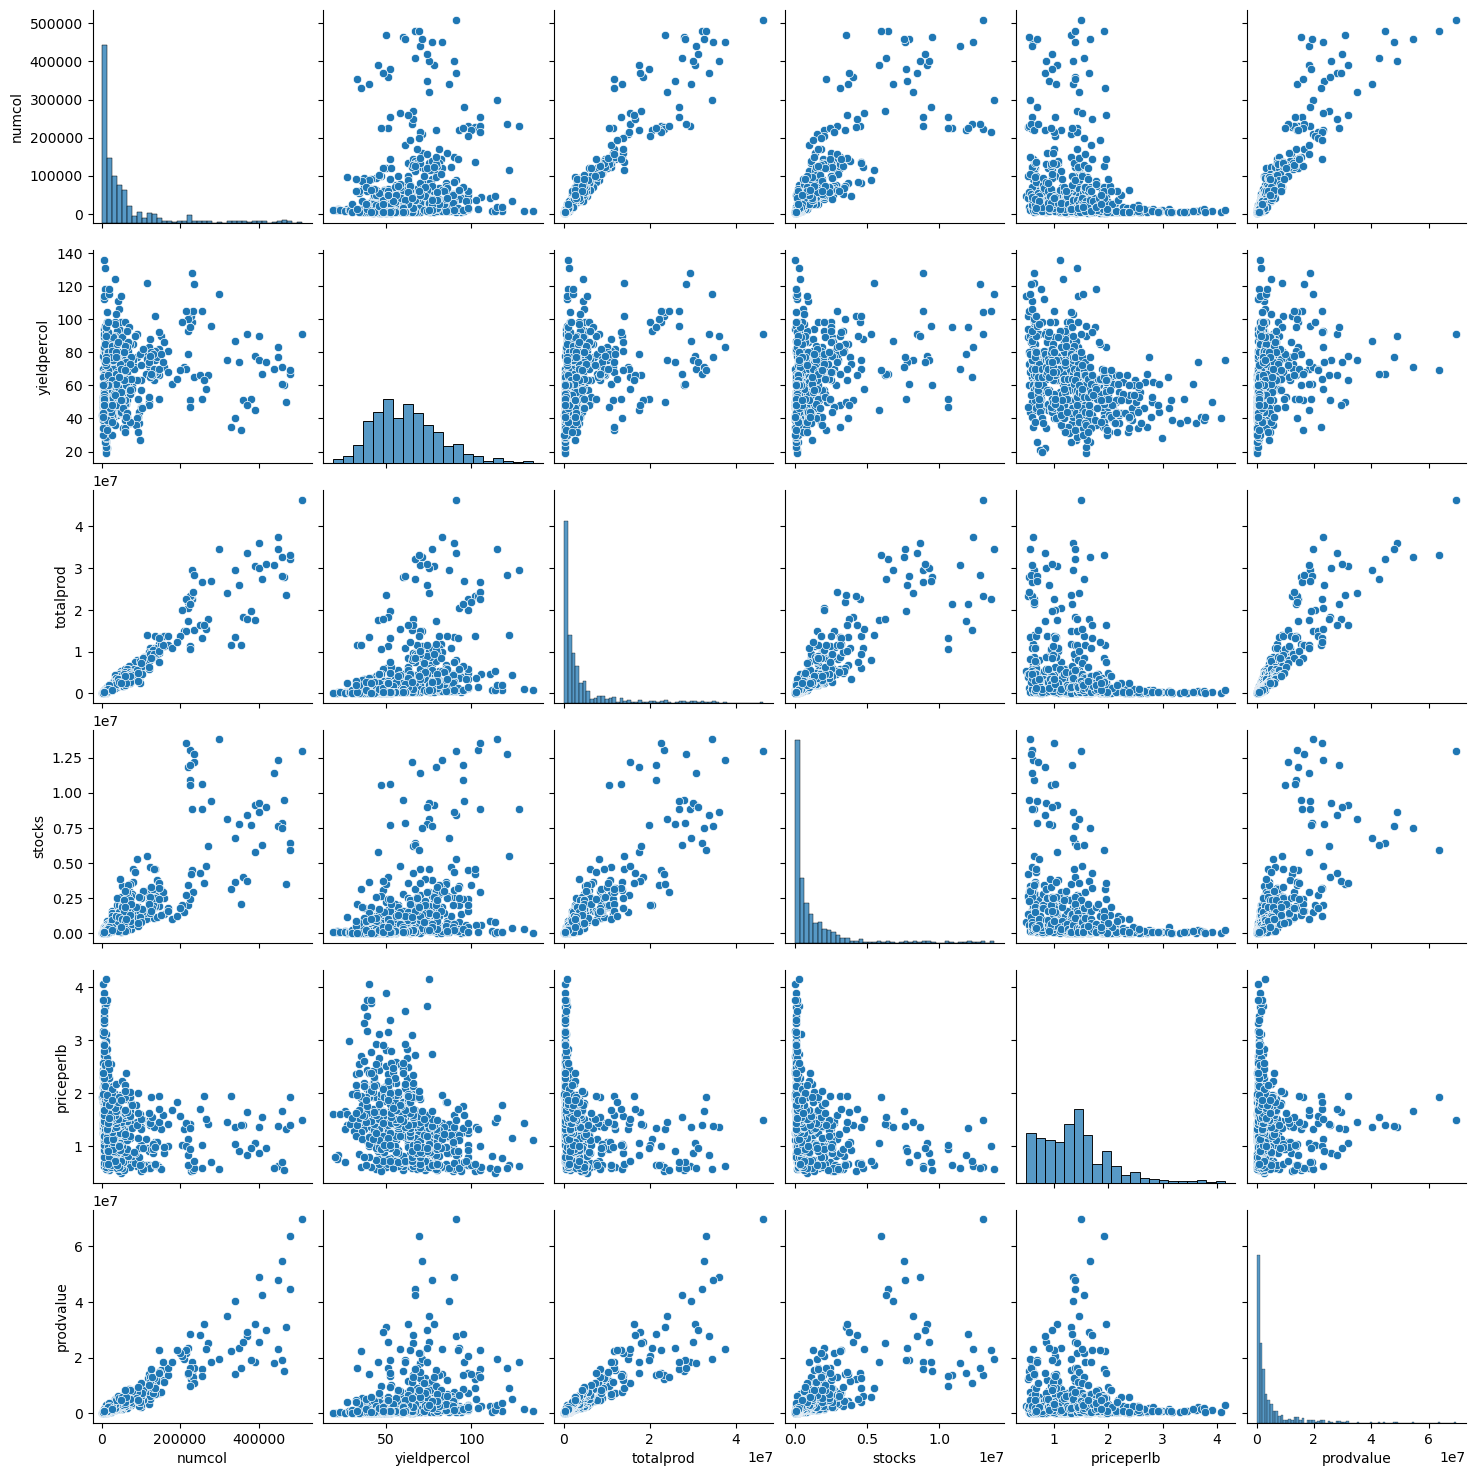

In [34]:
sns.pairplot(df[['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue']]);

We can see a significant growth in totalproduction when the product value and the number of colonies increased. The stocks also has increased when the production has increased.

## Q3 – Statistical Analysis

### 1) Visualize distribution of numcol, yieldpercol, priceperlb, stocks in one single frame using subplots and share your insights.

<Axes: xlabel='stocks', ylabel='Count'>

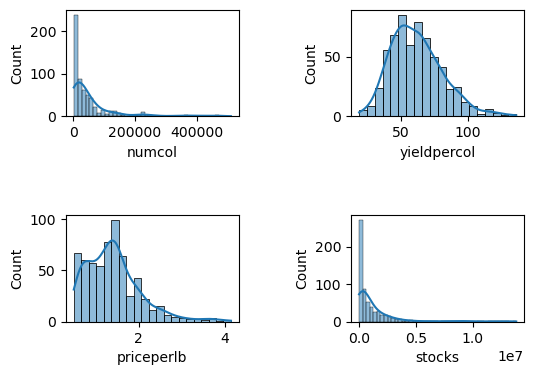

In [35]:
# Defining the dimensions of subplots
fig, axes = plt.subplots(2,2)
fig.tight_layout(pad=5.0)

# Create chart in each subplot
sns.histplot(data=df, x='numcol', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='yieldpercol', kde=True, ax=axes[0,1])
sns.histplot(data=df, x='priceperlb', kde=True, ax=axes[1,0])
sns.histplot(data=df, x='stocks', kde=True, ax=axes[1,1])

All the graphs are partially right skewed. Yieldpercol is having a slightly normal distribution. The numcol and the stocks are showing high right skewed graph.

### 2) Visualize, boxplot and confirm if there are any outliers.

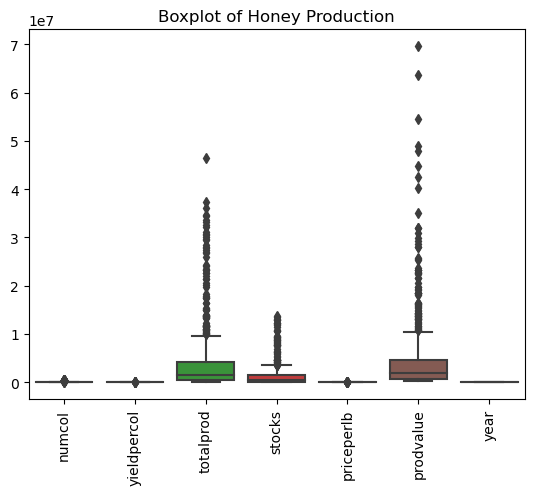

In [36]:
plt.title('Boxplot of Honey Production')
plt.xlim(30,300)
plt.xticks(rotation=90)
sns.axes_style('whitegrid')

sns.boxplot(data=df);

totalprod, stocks and prodvalue is showing a high number of outliers in which prodvalue is having the most number of outliers. Totalprod is having the second highest number of outliers and then stocks. numcol, yieldpercol and priceperlb is showing a few number of outliers but they are so low as compared to that of the other.

### 3) Find Skewness and Kurtosis of complete dataframe. 

In [37]:
# Finding the skewness of the dataframe
dataf = df.drop(['state'],axis=1)

In [38]:
print('Showing the skewness values of each columns')
dataf.skew(axis=0, skipna=True)

Showing the skewness values of each columns


numcol         2.762265
yieldpercol    0.693433
totalprod      2.901248
stocks         3.231799
priceperlb     1.194120
prodvalue      3.841915
year           0.046555
dtype: float64

prodvalue is having the maximum skewness with 3.841915, stocks comes in next with 3.231799 value of skewness and then totalprod with 2.901248 and so on. Also all the values are right skewed.

In [39]:
# Finding the kurtosis of the columns of the dataframe
dataf.kurtosis(axis=0, skipna=True)

numcol          7.880120
yieldpercol     0.593365
totalprod       8.897969
stocks         11.354505
priceperlb      2.113795
prodvalue      19.316621
year           -1.207826
dtype: float64

prodvalue is having the maximum kurtosiswith a value of 19.316621, then stocks is having the second highest kurtosis in the column with 11.354505. After that comes totalprod with kurtosis of 8.897969 value and so on.

### 4) Make a new copy of dataset and use for further analysis.

In [40]:
newdata = dataf.copy()

In [41]:
newdata = newdata.drop(['year'],axis = 1)

In [42]:
newdata.head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,16000,71,1136000,159000,0.72,818000
1,55000,60,3300000,1485000,0.64,2112000
2,53000,65,3445000,1688000,0.59,2033000
3,450000,83,37350000,12326000,0.62,23157000
4,27000,72,1944000,1594000,0.70,1361000


### 5) Try to make the skewed data as normal as possible & visualize the same.

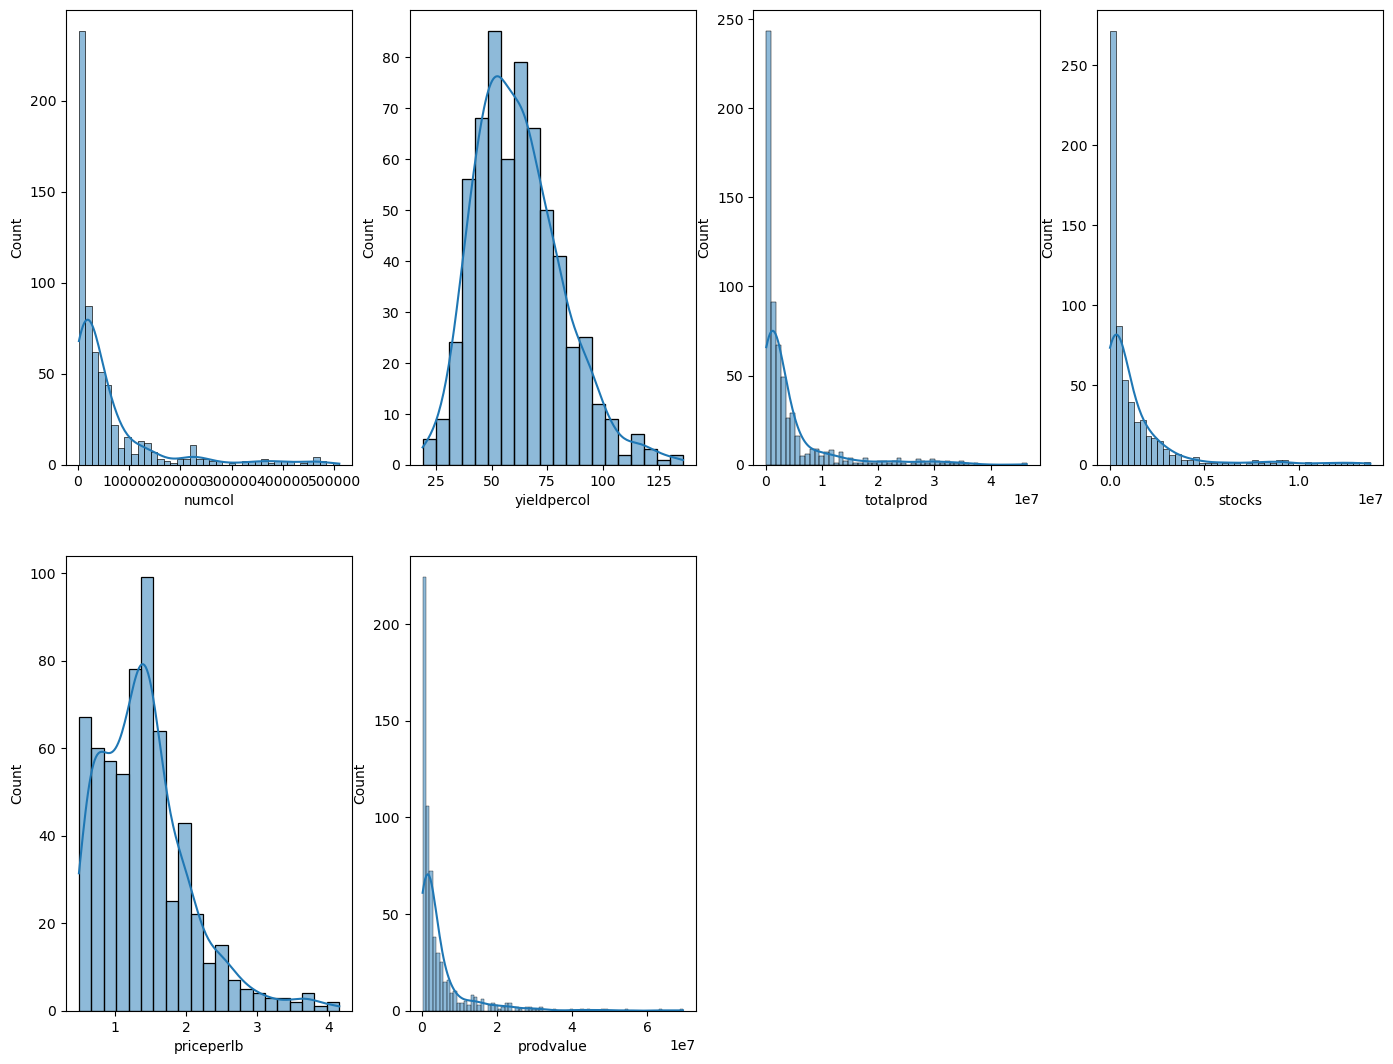

In [43]:
# Show the data before normalizing the skewness
plt.figure(figsize=(17,13))
for i in list(enumerate(newdata.columns)):
    plt.subplot(2, 4, i[0]+1)
    sns.histplot(data = newdata[i[1]], kde=True)

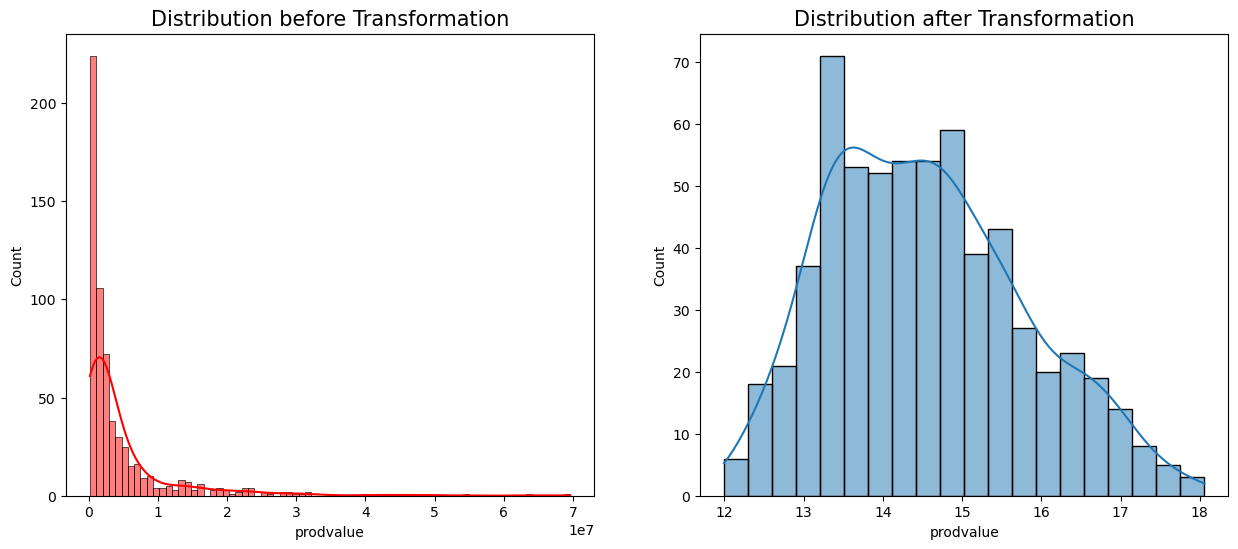

Skewness was 3.841915 before & is 0.42 after Log transformation.


In [44]:
def logTrans(feature):
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(newdata[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(newdata))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {3.841915} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    
logTrans(feature="prodvalue")

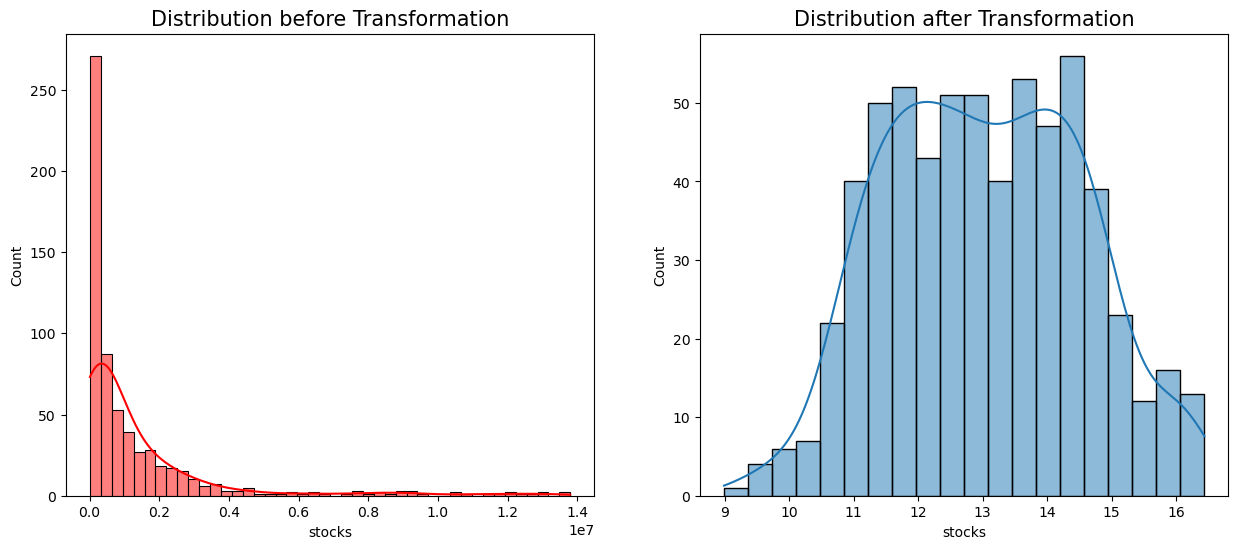

Skewness was 3.231799 before & is 0.08 after Log transformation.


In [45]:
def logTrans(feature):
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(newdata[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(newdata))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {3.231799} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    
logTrans(feature="stocks")

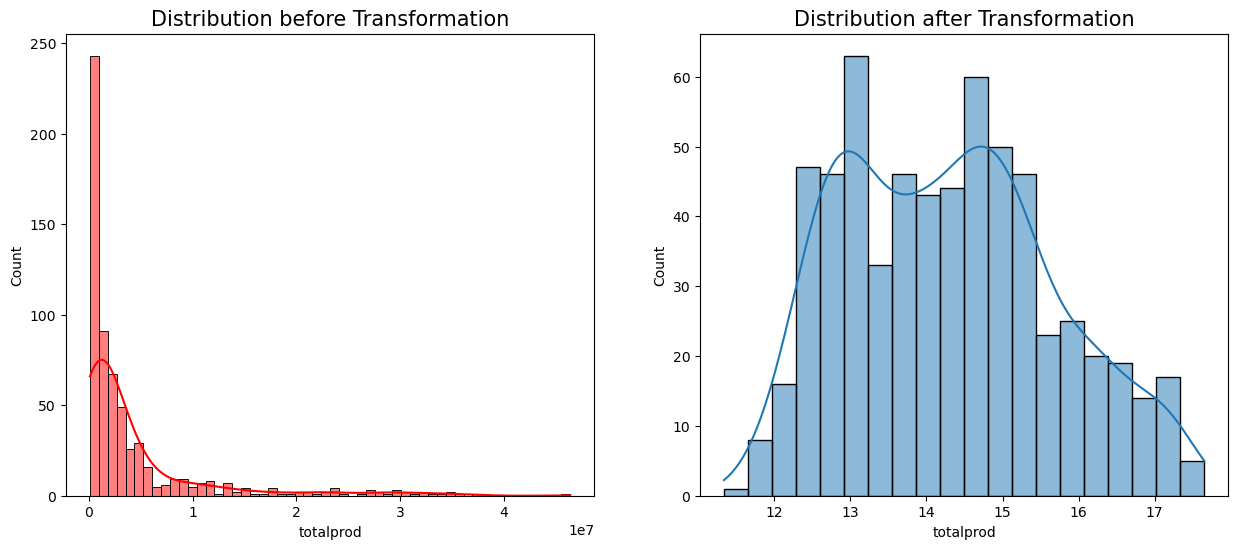

Skewness was 2.901248 before & is 0.31 after Log transformation.


In [46]:
def logTrans(feature):
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(newdata[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(newdata))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {2.901248} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    
logTrans(feature="totalprod")

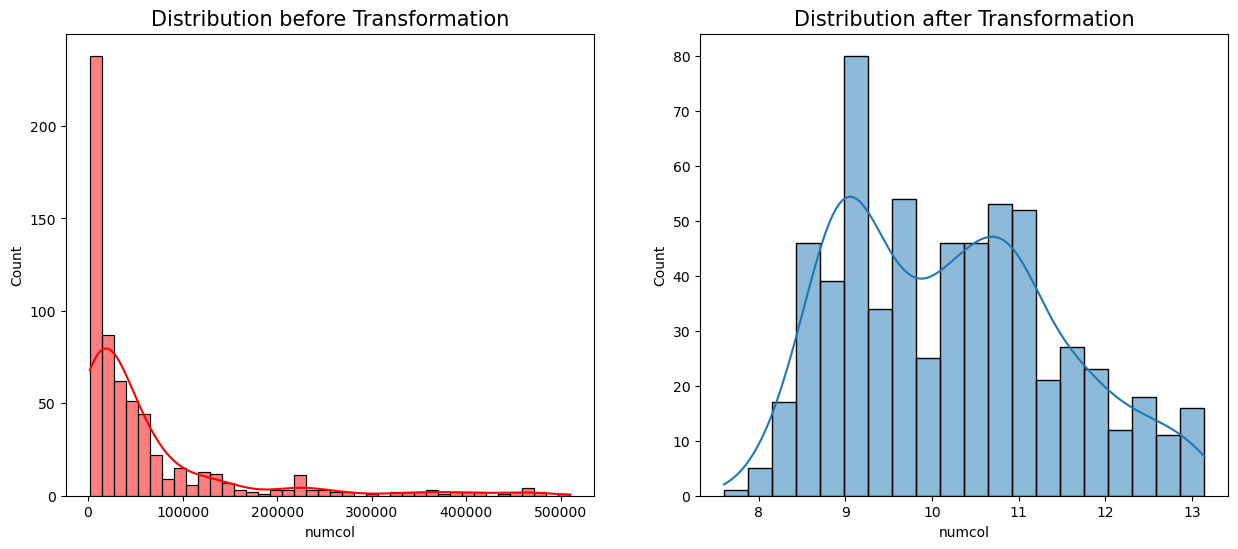

Skewness was 2.762265 before & is 0.38 after Log transformation.


In [47]:
def logTrans(feature):
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(newdata[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(newdata))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {2.762265} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    
logTrans(feature="numcol")

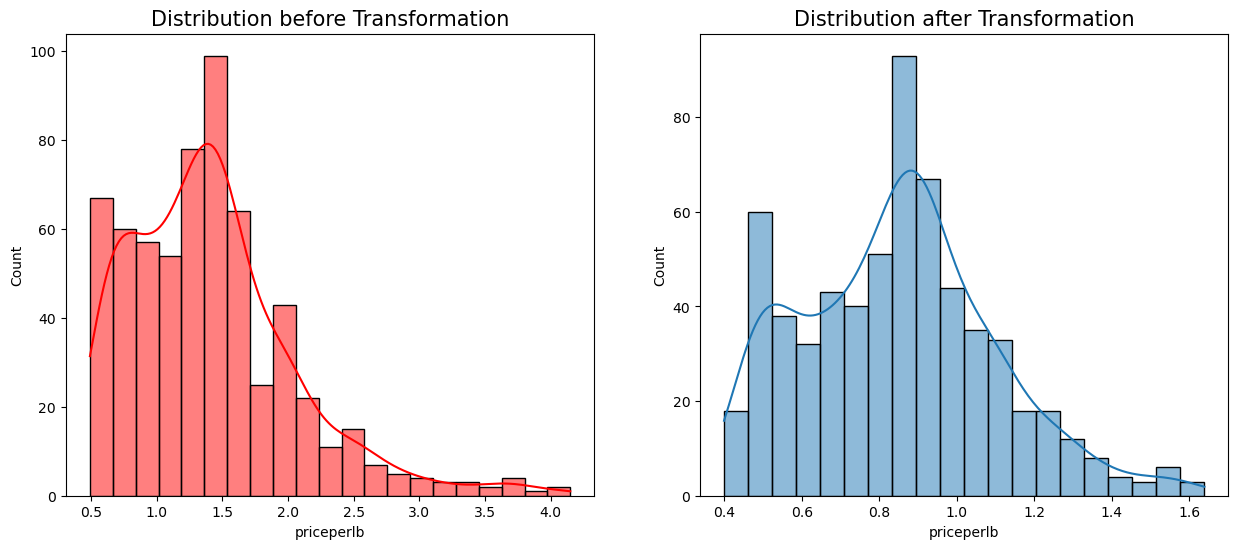

Skewness was 1.19412 before & is 0.41 after Log transformation.


In [48]:
def logTrans(feature):
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(newdata[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(newdata))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {1.194120} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    
logTrans(feature="priceperlb")

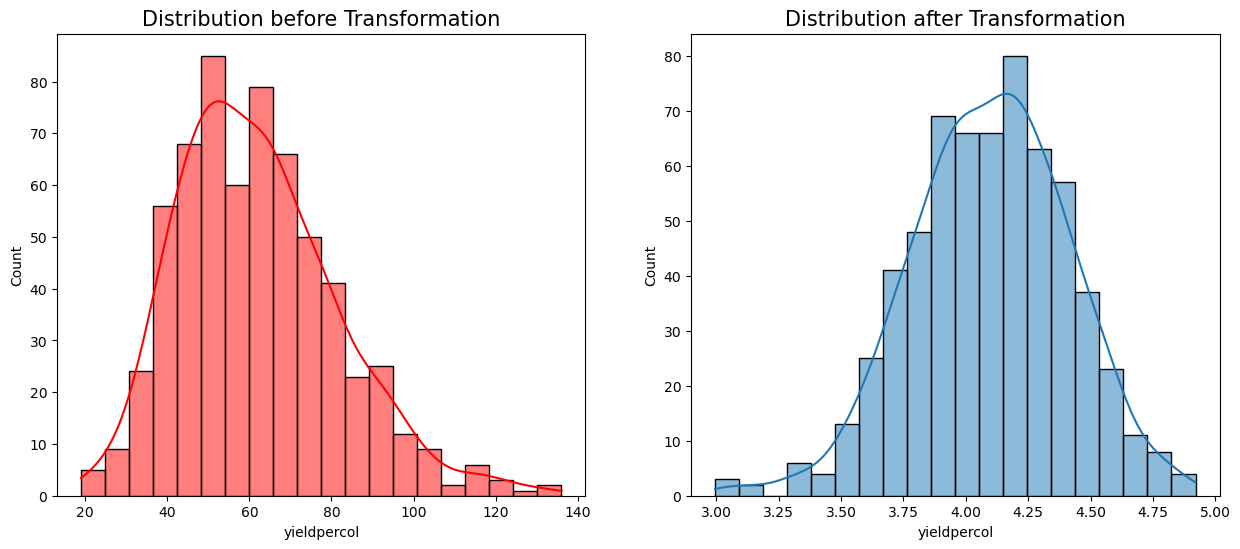

Skewness was 0.693433 before & is -0.23 after Log transformation.


In [49]:
def logTrans(feature):
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(newdata[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(newdata))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {0.693433} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    
logTrans(feature="yieldpercol")